![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/68886973-eca24380-06f6-11ea-8327-3e9a22e22b43.png"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# Health and Obesity trends

Let's put in practice the topics covered in the course and analyze health and obesity trends.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import requests

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the dump of `USDA Food Composition Database` into a `food_df` DataFrame variable.

The National Nutrient Database (NNDB) is provided by the [USDA](https://ndb.nal.usda.gov/ndb/) to allow the public to get standardized information on foods. They document the database and all supporting information on the USDA website.

> Although the file format says "txt", we call these plain CSVs files and read it using `read_csv` method. Be aware of parsing correctly `NaN` values, data separator, encoding, quotechar and any other parsing option you think necessary.

Here's a preview of that file:

In [2]:
!head data/FOOD_DES.txt

~01001~^~0100~^~Butter, salted~^~BUTTER,WITH SALT~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01002~^~0100~^~Butter, whipped, with salt~^~BUTTER,WHIPPED,W/ SALT~^^^~Y~^^0^^6.38^^^
~01003~^~0100~^~Butter oil, anhydrous~^~BUTTER OIL,ANHYDROUS~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01004~^~0100~^~Cheese, blue~^~CHEESE,BLUE~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01005~^~0100~^~Cheese, brick~^~CHEESE,BRICK~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01006~^~0100~^~Cheese, brie~^~CHEESE,BRIE~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01007~^~0100~^~Cheese, camembert~^~CHEESE,CAMEMBERT~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01008~^~0100~^~Cheese, caraway~^~CHEESE,CARAWAY~^^^^^0^^6.38^4.27^8.79^3.87
~01009~^~0100~^~Cheese, cheddar (Includes foods for USDA's Food Distribution Program)~^~CHEESE,CHEDDAR~^^^~Y~^^0^^^^^
~01010~^~0100~^~Cheese, cheshire~^~CHEESE,CHESHIRE~^^^^^0^^6.38^4.27^8.79^3.87


The column names are taken from the original documentation for this dataset.

> Use the given column names while reading the data.

In [3]:
column_names = ['NDB_No', 'FdGrp_Cd', 'Long_Desc', 'Shrt_Desc', 'ComName',
                'ManufacName', 'Survey', 'Ref_desc', 'Refuse', 'SciName',
                'N_Factor', 'Pro_Factor', 'Fat_Factor', 'CHO_Factor']

In [4]:
food_df = pd.read_csv(
    'data\FOOD_DES.txt', 
    names = column_names, 
    delimiter= '^', 
    quotechar='~')
food_df.head(5)

,NDB_No,FdGrp_Cd,Long_Desc,Shrt_Desc,ComName,ManufacName,Survey,Ref_desc,Refuse,SciName,N_Factor,Pro_Factor,Fat_Factor,CHO_Factor
0,1001,100,"Butter, salted","BUTTER,WITH SALT",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87
1,1002,100,"Butter, whipped, with salt","BUTTER,WHIPPED,W/ SALT",NaN,NaN,Y,NaN,0.0,NaN,6.38,NaN,NaN,NaN
2,1003,100,"Butter oil, anhydrous","BUTTER OIL,ANHYDROUS",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87
3,1004,100,"Cheese, blue","CHEESE,BLUE",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87
4,1005,100,"Cheese, brick","CHEESE,BRICK",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87


In [5]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NDB_No       2429 non-null   int64  
 1   FdGrp_Cd     2429 non-null   int64  
 2   Long_Desc    2429 non-null   object 
 3   Shrt_Desc    2429 non-null   object 
 4   ComName      85 non-null     object 
 5   ManufacName  338 non-null    object 
 6   Survey       1294 non-null   object 
 7   Ref_desc     626 non-null    object 
 8   Refuse       2427 non-null   float64
 9   SciName      212 non-null    object 
 10  N_Factor     1801 non-null   float64
 11  Pro_Factor   1489 non-null   float64
 12  Fat_Factor   1581 non-null   float64
 13  CHO_Factor   1478 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 265.8+ KB


How many products do we have?

In [6]:
food_df.shape[0]

2429

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Variables distribution

Analyze how values are distributed:

- Create an histogram of `Refuse` variable.
- Create a boxplot of `N_Factor` variable.

array([[<Axes: title={'center': 'Refuse'}>]], dtype=object)

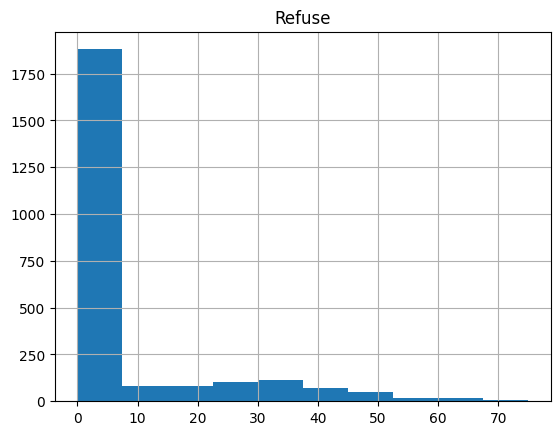

In [7]:
food_df.hist(column='Refuse')

<Axes: >

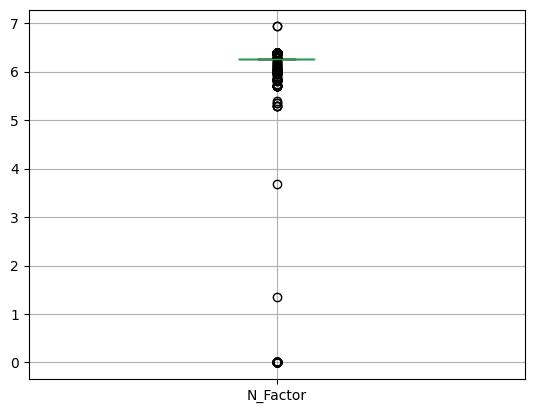

In [8]:
food_df.boxplot(column='N_Factor')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which are the top-10 food manufacturers with more products on `food_df`.

In [9]:
top_manufac = food_df.value_counts('ManufacName')[:10]
top_manufac

ManufacName
The Quaker Oats, Co.    71
MEAD JOHNSON            40
MOM Brands              31
ABBOT NUTRTION          26
Post Foods, LLC         21
Kraft Foods, Inc.       18
Chobani                 17
B&G Foods, Inc          13
GERBER                  12
Campbell Soup Co.       10
dtype: int64

Also create a bar plot showing that results.

<Axes: ylabel='ManufacName'>

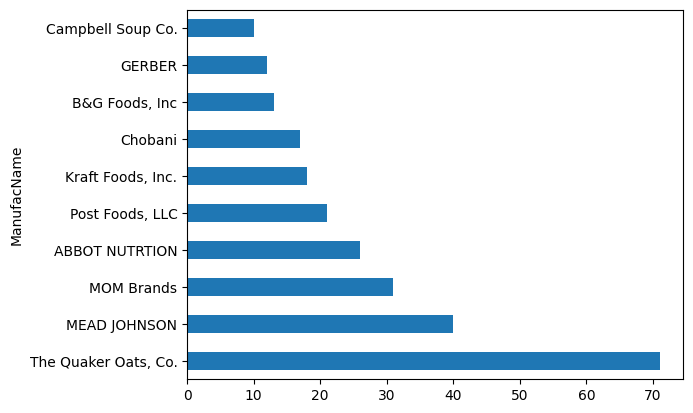

In [10]:
top_manufac.plot.barh()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Analyzing Starbucks nutrition facts

Starbucks is an American coffee chain founded in Seattle. It serves both beverages and food.

<img width="650" alt="Starbucks" src="https://user-images.githubusercontent.com/7065401/68891327-57f01380-06ff-11ea-8461-eb35ba0c3bb0.png">

We'll analyze the nutritional information for Starbucks’ drink menu items using this [Nutrition facts for Starbucks drinks](https://www.kaggle.com/starbucks/starbucks) data. All nutritional information for drinks are for a 12oz serving size.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Getting Starbucks' drinks information

- Create an sqlite3 connection to the `starbucks.db` SQLite3 database.
- Read from the `drinks` table just the items with more than 100 calories and save them to a `drinks_df` DataFrame variable.

In [11]:
conn = sqlite3.connect('data\starbucks.db')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which is the item with the highest calories?

In [12]:
drinks_df = pd.read_sql('SELECT * FROM drinks WHERE Calories > 100', conn)
drinks_df.head()

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
0,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
1,Iced Espresso Classics - Vanilla Latte,130.0,2.5,21.0,0.0,5.0,65.0
2,Iced Espresso Classics - Caffe Mocha,140.0,2.5,23.0,0.0,5.0,90.0
3,Iced Espresso Classics - Caramel Macchiato,130.0,2.5,21.0,0.0,5.0,65.0
4,Tazo® Bottled Black Mango,150.0,0.0,38.0,0.0,0.0,15.0


In [13]:
drinks_df.loc[drinks_df['Calories'] == drinks_df['Calories'].max()]

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
31,Starbucks® Signature Hot Chocolate,430.0,26.0,45.0,5.0,12.0,115.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create two groups of items: "`less or equal 150 calories`" and "`more 150 calories`"

In [14]:
less_equal_150_cal = drinks_df[drinks_df['Calories'] <= 150]
less_equal_150_cal.head()

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
0,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
1,Iced Espresso Classics - Vanilla Latte,130.0,2.5,21.0,0.0,5.0,65.0
2,Iced Espresso Classics - Caffe Mocha,140.0,2.5,23.0,0.0,5.0,90.0
3,Iced Espresso Classics - Caramel Macchiato,130.0,2.5,21.0,0.0,5.0,65.0
4,Tazo® Bottled Black Mango,150.0,0.0,38.0,0.0,0.0,15.0


In [15]:
more_150_cal = drinks_df[drinks_df['Calories'] > 150]
more_150_cal.head()

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
17,Starbucks® Doubleshot Protein Dark Chocolate,210.0,2.5,33.0,2.0,20.0,115.0
18,Starbucks® Doubleshot Protein Vanilla,200.0,2.5,34.0,2.0,20.0,120.0
30,Hot Chocolate,320.0,9.0,47.0,4.0,14.0,160.0
31,Starbucks® Signature Hot Chocolate,430.0,26.0,45.0,5.0,12.0,115.0
32,Caffè Latte,190.0,7.0,19.0,0.0,13.0,170.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Compare item characteristics

Create a `compare_groups()` function that compares a given field of both groups of data, `less_equal_150_cal` and `more_150_cal`, by showing two overlapped histograms.

- You should use different colors per histogram. Also add a little bit of opacity (use `alpha=0.4`).
- The function MUST check that the given field exists, and raise `ValueError` with a "Field not found" message otherwise.


In [16]:
def compare_groups(field):
    if field in drinks_df.columns:
        less_equal_150_cal[field].hist(color = 'green', alpha = .4, grid=False)
        more_150_cal[field].hist(color = 'red', alpha = .4, grid=False)
    else:
        raise ValueError(f'Field {field} not found')

Validate your function showing a comparison of the `Calories` per group.

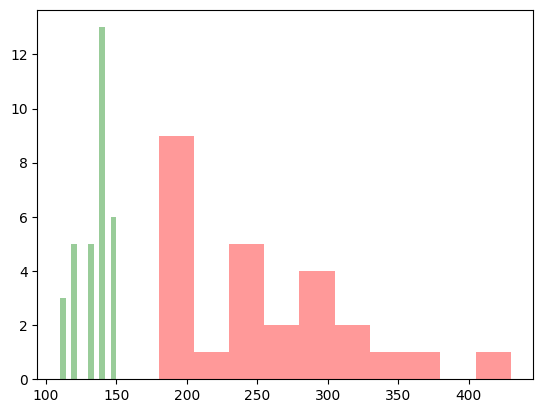

In [17]:
compare_groups('Calories')

Now answer: **Less Calories implies less Sodium?**

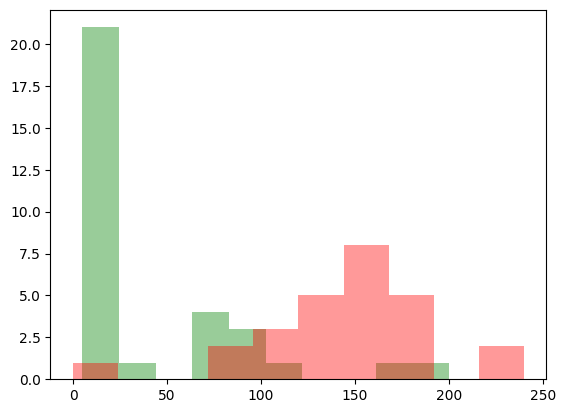

In [18]:
compare_groups('Sodium')

**Less Calories implies less Carbs?**

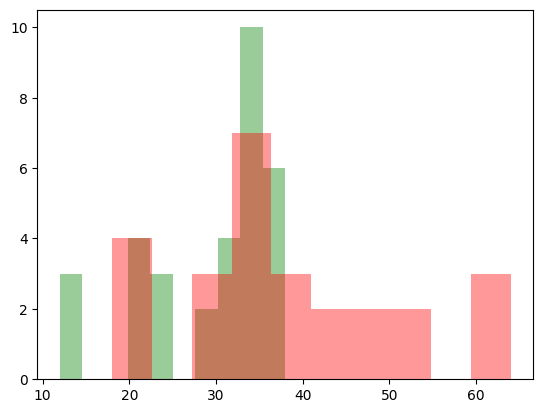

In [19]:
compare_groups('Carb')

**Less Calories implies less Proteins?**

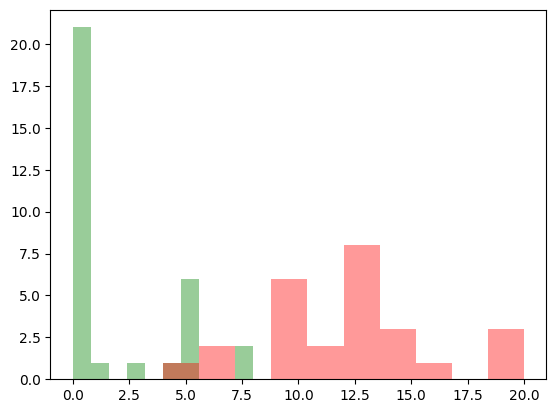

In [20]:
compare_groups('Protein')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Healthy diet interest

In order to measure interest on healthy diets, we'll analyze how many pageviews the article `Healthy diet` received during the last years.

![Food-piramid](https://user-images.githubusercontent.com/7065401/68880286-bf02cd80-06e9-11ea-8d42-ff6dbb539f7d.png)

To get pageviews from Wikipedia, we'll need to use the _Analytics API_. Here you can find [the documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews) to get pageviews from an article.

To get monthly pageviews for a given article, you can use the following endpoint:

```
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{ARTICLE}/monthly/{START}/{END}
```

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get data from Wikipedia using its API

Make a request to Wikipedia API to get monthly page views for `Healthy_diet` article from year 2015 (`2015010100`) to 2019 (`2019100100`).

Store the response in a `pageviews_df` DataFrame variable.

In [21]:
url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/Healthy_diet/monthly/2015010100/2019100100"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36'
}

In [22]:
resp = requests.get(url, headers=headers)
json_dict = resp.json()
pageviews_df = pd.DataFrame.from_dict(json_dict['items'])
pageviews_df.head()

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,Healthy_diet,monthly,2015070100,all-access,all-agents,24293
1,en.wikipedia,Healthy_diet,monthly,2015080100,all-access,all-agents,41794
2,en.wikipedia,Healthy_diet,monthly,2015090100,all-access,all-agents,23606
3,en.wikipedia,Healthy_diet,monthly,2015100100,all-access,all-agents,26351
4,en.wikipedia,Healthy_diet,monthly,2015110100,all-access,all-agents,24596


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### When was the highest search peak?

Save in a `max_pageviews_str` variable the date where `Healthy_diet` article had the highest volume of page views.

Also save a `max_pageview_date` with that previous value parsed to `datetime`.

In [23]:
max_pageviews_df = pageviews_df.loc[pageviews_df['views'] == pageviews_df['views'].max()]
max_pageviews_df

,project,article,granularity,timestamp,access,agent,views
24,en.wikipedia,Healthy_diet,monthly,2017070100,all-access,all-agents,56795


In [24]:
max_pageviews_str = max_pageviews_df['timestamp'].values[0]
max_pageviews_date = pd.to_datetime(max_pageviews_str, format='%Y%m%d%H')
print(max_pageviews_str)
print(max_pageviews_date)

2017070100
2017-07-01 00:00:00


We can draw a quick plot showing the evolution of `views` per month:

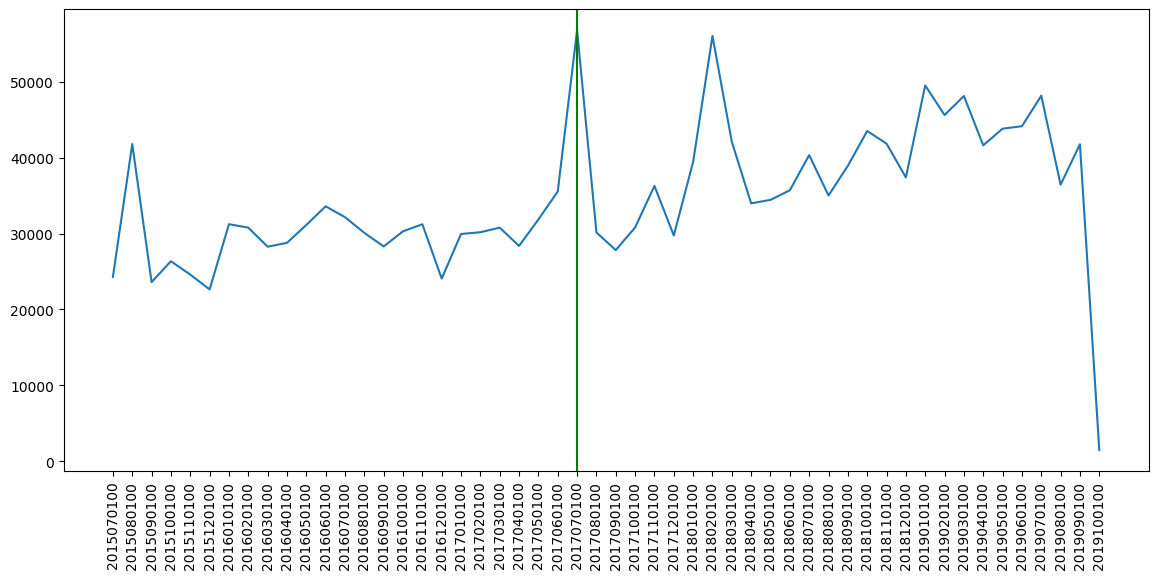

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(pageviews_df['timestamp'], pageviews_df['views'])

plt.axvline(x=max_pageviews_str, color='green')

plt.xticks(rotation=90)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get more data from Wikipedia API

Create a `get_pageviews_count()` function that receives a variable number **article names** as argument, and returns a dictionary with the sum of pageviews during 2018 for each of these article names.

- The function MUST check that at least one parameter is found, and raise a `ValueError` otherwise.

```
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{ARTICLE}/monthly/2018010100/2018123100
```

In [26]:
def get_pageviews_count(*args):
    if not args:
        raise ValueError(f'{args} not found')

    base_url = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{}/monthly/2018010100/2018123100'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36'
    }
    dict = {}

    for article_name in args:    
        url = base_url.format(article_name)   
        resp = requests.get(url, headers=headers)   
        json_dict = resp.json()
        article_df = pd.DataFrame.from_dict(json_dict['items'])

        dict[article_name] = article_df['views'].sum()
    
    return dict



Calling `get_pageviews_count('Healthy_diet', 'Food', 'Obesity')` should return something like:

```
{'Healthy_diet': 478712, 'Food': 1125874, 'Obesity': 1092577}
```

In [27]:
get_pageviews_count('Healthy_diet', 'Food', 'Obesity')

{'Healthy_diet': 478712, 'Food': 1125874, 'Obesity': 1092577}

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Obesity trends in the USA

Obesity in the United States is a major health issue, resulting in numerous diseases, specifically increased risk of certain types of cancer, coronary artery disease, type 2 diabetes, stroke, as well as significant increases in early mortality and economic costs.

Let's analyze obesity trends on each state of the USA. To do that take a look at the _Obesity in the United States_ Wikipedia article where they analyze obesity revalence by state and territory.

<img width="500" alt="Obesity-trends" src="https://user-images.githubusercontent.com/7065401/68873389-5a8e4100-06de-11ea-844c-5ec622af5caa.png">

In [28]:
url = 'https://en.wikipedia.org/wiki/Obesity_in_the_United_States'

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the HTML table at the end of the article into a `obesity_df` DataFrame object.

> Be aware of parsing correctly `NaN` values that appear as `—` characters.

<img width="450" alt="Obesity-table" src="https://user-images.githubusercontent.com/7065401/68880373-e5286d80-06e9-11ea-9bd0-f59ffcf02341.png">

In [29]:
obesity_tables = pd.read_html(url, na_values='—')
obesity_df =obesity_tables[1]

obesity_df.head()

States, district, & territories Obesityrank Obese adults                 \
  States, district, & territories Obesityrank  (mid-2000s) (2020)[91][97]   
0                         Alabama         5.0        30.1%          36.3%   
1                          Alaska         9.0        27.3%          34.2%   
2                  American Samoa         NaN          NaN        75%[95]   
3                         Arizona        30.0        23.3%          29.5%   
4                        Arkansas         7.0        28.1%          35.0%   

  Overweight(incl. obese)adults(mid-2000s)  \
  Overweight(incl. obese)adults(mid-2000s)   
0                                    65.4%   
1                                    64.5%   
2                                  95%[98]   
3                                    59.5%   
4                                    64.7%   

  Obese childrenand adolescents(mid-2000s)[96]  
  Obese childrenand adolescents(mid-2000s)[96]  
0                                        16.7%  
1                                        11.1%  
2                                  35%[95][99]  
3                                        12.2%  
4                                        16.4%

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Sort the states by _Obesity rank_ and get the 5 states at the top. Show name and obesity rank.

In [30]:
top_5 = obesity_df.sort_values(('Obesityrank','Obesityrank')).iloc[:5]
top_5

States, district, & territories Obesityrank Obese adults                 \
   States, district, & territories Obesityrank  (mid-2000s) (2020)[91][97]   
53                   West Virginia         1.0        30.6%          38.1%   
26                     Mississippi         2.0        34.4%          37.3%   
39                        Oklahoma         3.0        28.1%          36.5%   
17                            Iowa         4.0        26.3%          36.4%   
0                          Alabama         5.0        30.1%          36.3%   

   Overweight(incl. obese)adults(mid-2000s)  \
   Overweight(incl. obese)adults(mid-2000s)   
53                                    66.8%   
26                                    67.4%   
39                                    64.2%   
17                                    63.4%   
0                                     65.4%   

   Obese childrenand adolescents(mid-2000s)[96]  
   Obese childrenand adolescents(mid-2000s)[96]  
53                                        20.9%  
26                                        17.8%  
39                                        15.4%  
17                                        12.5%  
0                                         16.7%

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)